In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Carrega o dateset
df_dsa = pd.read_csv('dataset.csv')

In [3]:
#Shape
df_dsa.shape

(9700, 11)

In [4]:
#Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
#Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [6]:
#Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
#Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
#Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
#Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
#Verificando se há valor ausente 
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [11]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [12]:
#1° pergunta: Qual Cidade com o maior Valor de venda de produtos da categoria 'Office Supplies'?

#Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_dsa_p1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']


In [13]:
#Em seguida agrupamos por cidade e calculamos o total de valor_venda
df_dsa_p1_total = df_dsa_p1.groupby('Cidade') ['Valor_Venda'].sum()

In [14]:
#Entaõ encotramos a cidade com maior valor de venda
cidade_maior_venda = df_dsa_p1_total.idxmax()
print(f"Cidade com maior valor de venda para 'Office Supplies': {cidade_maior_venda}")

Cidade com maior valor de venda para 'Office Supplies': New York City


In [15]:
#Para conferir o resutlado
df_dsa_p1_total.sort_values(ascending=False)

Cidade
New York City      68362.814
Los Angeles        47098.100
San Francisco      41771.198
Seattle            34856.878
Philadelphia       29313.687
Detroit            18431.452
Houston            16125.276
Springfield        13887.152
Columbus           13682.256
Chicago            13449.746
Minneapolis        13035.650
Columbia           12511.988
Atlanta            11011.940
Jackson             9188.405
Richmond            8063.430
San Diego           7672.866
Newark              6851.236
Jacksonville        6703.436
North Las Vegas     6129.546
Dallas              6005.564
Sacramento          5171.518
Providence          5039.740
Fayetteville        4888.764
Alexandria          4879.790
Roswell             4760.310
Midland             4727.572
Henderson           4616.608
Morristown          4478.650
Charlotte           4351.988
Fairfield           4274.961
                     ...    
Woodstock             11.762
Elkhart               11.680
San Angelo            11.648
Rapid C

In [16]:
#2° pergunta: Qual o Total de Vendas por Data do Pedido? (Resultado através de gráfico de barras)

#Calculamos o total de vendas para cada data de pedido
df_dsa_p2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [17]:
df_dsa_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

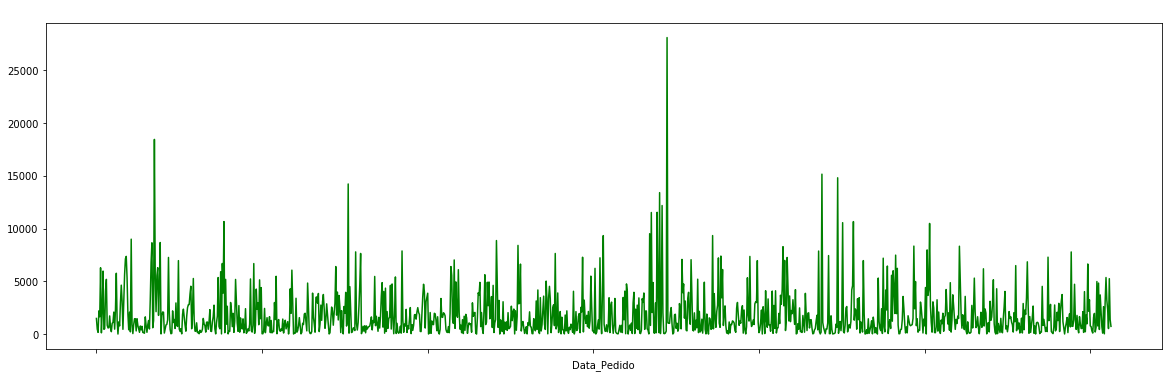

In [21]:
#Plot
plt.figure(figsize=(20,6))
df_dsa_p2.plot(x='Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas por data do período', color='white')
plt.show()

In [22]:
#3° Qual o total de vendas por estado? (Demonstre o resultado através de um gráfico de barras)

#Agrupamos por estado e calculamos o total de vendas
df_dsa_p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

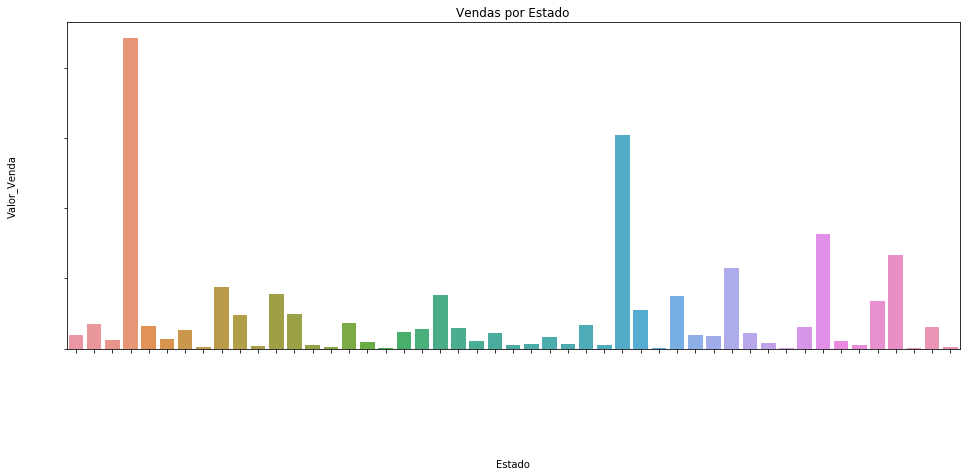

In [29]:
#Plot
plt.figure(figsize = (16,6))
sns.barplot(data = df_dsa_p3,
            y = 'Valor_Venda',
            x = 'Estado').set(title = 'Vendas por Estado')
plt.xticks(rotation = 80, color = 'white')
plt.yticks(color = 'white')
plt.show()

In [30]:
#4° Quais são as 10 cidades com maior total de vendas? (Demonstre o resultado através de um gráfico de barras)

#Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
df_dsa_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending= False).head(10)

In [31]:
df_dsa_p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


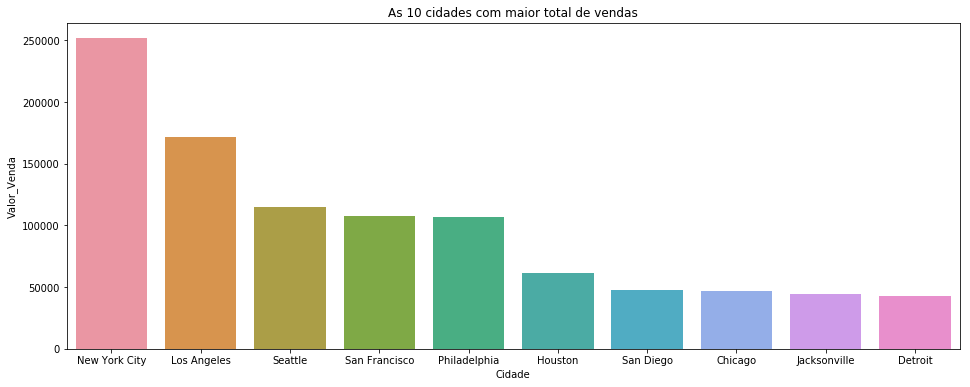

In [33]:
#plot
plt.figure(figsize = (16,6))
sns.set_palette('coolwarm')
sns.barplot(data=df_dsa_p4,
            y = 'Valor_Venda',
            x = 'Cidade').set(title = 'As 10 cidades com maior total de vendas')
plt.show()

In [34]:
#5° Qual segmento teve o maior total de vendas? (Demonstre através de um gráfico de pizza)

#Agrupamos por segmento e calculamos o total de vendas
df_dsa_p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending=False)

In [35]:
df_dsa_p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [36]:
#Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'${val}'
    return my_format

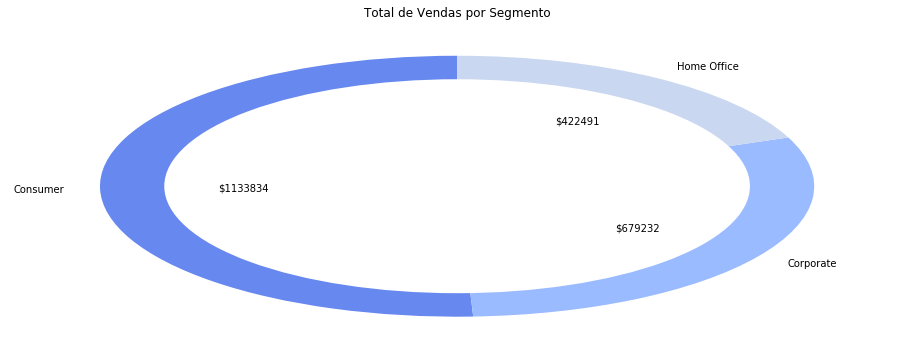

In [38]:
#Plot

#Tamanho da figura
plt.figure(figsize = (16, 6))

#Gráfico pizza
plt.pie(df_dsa_p5['Valor_Venda'],
        labels = df_dsa_p5['Segmento'],
        autopct=autopct_format(df_dsa_p5['Valor_Venda']),
        startangle=90)

#Limpa o círculo central
centre_circle = plt.Circle((0,0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Labels e anotações
#plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p5['Valor_Venda']))), xy=(-0.25, 0))
plt.title('Total de Vendas por Segmento')
plt.show()

In [39]:
#6° Qual o total de vendas por segmento e por ano? 

#Convertemos a coluna de data para o tipo datatime para obter o formato adequado
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst=True)

In [40]:
#Extraímos ano e mês criando duas novas variáveis
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

In [41]:
#Total de vendas por segmento e por ano
df_dsa_P6 = df_dsa.groupby('Ano')['Segmento'].value_counts()

In [42]:
df_dsa_P6

Ano   Segmento   
2015  Consumer       1024
      Corporate       595
      Home Office     302
2016  Consumer       1110
      Corporate       600
      Home Office     334
2017  Consumer       1289
      Corporate       770
      Home Office     450
2018  Consumer       1616
      Corporate       965
      Home Office     645
Name: Segmento, dtype: int64

In [43]:
#7° Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo: 1 - Se o Valor_venda for maior que 1000 recebe 15% de desconto
#       2 - Se o Valor_Venda for menor que 1000 recebe 10% de desconto
# Quantas vendas receberiam 15% de desconto?

In [44]:
#Cria uma nova coluna de acordo com a regra definida acima
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)

In [45]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [46]:
#Total por cada valor da variável
df_dsa['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [47]:
print('No total 457 Vendas receberiam desconto de 15%')

No total 457 Vendas receberiam desconto de 15%


In [48]:
#8° Considere que a empresa decida conceder o desconto de 15% do item anterior. Qual seria a média do valor de vendas antes e depois do desconto?

#Criamos uma coluna calculando o valor de venda menos o desconto
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])

In [49]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [50]:
#Filtrando as vendas antes do desconto de 15%
df_dsa_P8_vendas_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']

In [51]:
#Filtrando as vendas depois do desconto de 15%
df_dsa_P8_vendas_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desconto'] 

In [52]:
#Calcula a média das vendas antes do desconto de 15%
media_vendas_antes_desconto = df_dsa_P8_vendas_antes_desconto.mean()

In [53]:
#calcula a média das vendas depois do desconto de 15%
media_vendas_depois_desconto = df_dsa_P8_vendas_depois_desconto.mean()

In [54]:
print(f'Média das vendas antes do desconto de 15%: {round(media_vendas_antes_desconto, 2)}')

Média das vendas antes do desconto de 15%: 2116.81


In [55]:
print(f'Média das vendas depois do desconto de 15%: {round(media_vendas_depois_desconto, 2)}')

Média das vendas depois do desconto de 15%: 1799.29


In [56]:
#9° Qual é a média de vendas por segmento, por ano e por mês? (demonstre o resultado através de gráfico de linha)

#Extraímos o mês e gravamos em uma nova variável
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month

In [58]:
#Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
df_dsa_p9 = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [59]:
df_dsa_p9

sum         mean   median
Ano  Mes Segmento                                     
2015 1   Consumer      6896.6290   146.736787   36.440
         Corporate     1701.5280   130.886769   51.940
         Home Office   5607.5500   329.855882   62.820
     2   Consumer      3167.8540   117.327926   22.776
         Corporate      623.1180    69.235333   62.310
         Home Office    168.3700    24.052857   12.960
     3   Consumer     11869.3040   152.170564   49.172
         Corporate    10952.1750   233.025000   32.960
         Home Office  32384.3180  1116.700621  122.352
     4   Consumer      9108.6120   189.762750   49.875
         Corporate    13743.2390   249.877073   52.096
         Home Office   4484.7720   186.865500   67.230
     5   Consumer     12628.2710   191.337439   56.910
         Corporate     9142.0000   247.081081   57.408
         Home Office   1687.1240   120.508857   70.040
     6   Consumer     25511.7556   280.348963   56.960
         Corporate     3970.9140   172.648435   65.520
         Home Office   4700.4660   293.779125   67.176
     7   Consumer     17376.1740   275.812286   53.720
         Corporate    10032.9880   213.467830   70.560
         Home Office   3715.6650   142.910192   31.166
     8   Consumer     15423.3315   195.232044   45.980
         Corporate     6034.4240   150.860600   49.204
         Home Office   4242.4310   176.767958   50.920
     9   Consumer     58719.0280   376.404026   61.080
         Corporate    15507.7450   250.124919   42.124
         Home Office   6578.9558   139.977783   30.816
     10  Consumer     16246.6970   228.826718   40.776
         Corporate    12637.6780   197.463719   84.534
         Home Office   2569.0180   107.042417   41.636
...                          ...          ...      ...
2018 3   Consumer     32291.5940   313.510621   63.488
         Corporate    16024.7488   246.534597   68.040
         Home Office   7256.2080   131.931055   43.872
     4   Consumer      9034.9240   103.849701   28.400
         Corporate    14803.0146   274.129900   51.652
         Home Office  11703.9715   198.372398   41.220
     5   Consumer     20624.6094   173.316045   46.200
         Corporate    14239.8348   169.521843   64.816
         Home Office   8961.5380   242.203730   58.480
     6   Consumer     20095.3077   170.299218   63.115
         Corporate    15081.8520   247.243475   53.900
         Home Office  13013.5680   232.385143   72.696
     7   Consumer     18552.0610   153.322818   62.040
         Corporate    16525.5990   262.311095   58.464
         Home Office   8886.4840   240.175243   76.776
     8   Consumer     31346.1040   282.397333   70.120
         Corporate    25678.4440   366.834914   85.950
         Home Office   5813.3000   176.160606   71.980
     9   Consumer     43669.9330   184.261321   47.120
         Corporate    23209.1590   168.182312   45.570
         Home Office  19183.8260   249.140597   63.686
     10  Consumer     22825.8242   191.813649   49.120
         Corporate    24877.1680   243.893804   44.664
         Home Office  29705.5150   412.576597   48.075
     11  Consumer     48813.4028   218.894183   48.860
         Corporate    44357.9862   341.215278   79.530
         Home Office  24009.3840   247.519423   56.560
     12  Consumer     48107.4558   183.616244   52.533
         Corporate    20524.4320   153.167403   46.460
         Home Office  13022.3910   224.523983   49.260

[144 rows x 3 columns]

In [60]:
#Vamos extrair os níveis
anos = df_dsa_p9.index.get_level_values(0)
meses = df_dsa_p9.index.get_level_values(1)
segmentos = df_dsa_p9.index.get_level_values(2)

In [ ]:
#Plot
plt.figure(figsize = (12,6))
sns.set()
fig1 = sns.relplot(kind='line', data = df_dsa_p9, y = 'mean', x = meses, hue = segmentos, col = anos, col_wrap=4)
plt.show()

In [ ]:
#10° 